In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import datetime
import csv
import tweepy
import numpy as np
import pandas as pd


consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
for tweet in api.search('AmazonIN'):
    print(tweet.text)

@amazonIN I was very exciting for amazon UPI, so I use UPI on 01/12/2019, the amount deducted but payment got stuck… https://t.co/SHrHHgT07i
👶Baby face towel-
     https://t.co/8B6cxTmiUz

👶cotton blanket-
    https://t.co/avEAagc9mm
5 Best newborn baby product 

👶Cotton Baby Muslin Swaddle-
        https://t.co/8aUKYNTACB

👶Newborn cloth diaper-… https://t.co/QNhkmIWUMx
RT @deepaknigam: @amit803 @amazonIN Can't trust Amazon, I ordered glucose meter and was supposed to be delivered  on Jan.01, 20 but has not…
@myntra @MyntraSupport @myntra_engg @Myntra_CC @MFIbyMyntra @MFWknd @denielwellington
@amazonIN @Flipkart
@amazonIN Sent a DM. Please acknowledge!
#QuizTimeMorningsWithAmazon
I have given the correct answers to all questions ......
I hope that ...... I will defi… https://t.co/5OXDlfV2M0
#QuizTimeMorningsWithAmazon
The questions have been answered correctly….  I firmly believe that …… I will definitel… https://t.co/kJcf9ZxUZV
@amazonIN
#DailyDigest | Here are your daily update of n

In [4]:
df = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count', 
                             'user_followers', 'User_location', 'rt_count', 'tweet_date'])

In [5]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i+=1
        if i == 2000:
            break
        else:
            pass

In [6]:
stream(data = ['AmazonIN'], file_name = 'AmazonIN')

In [7]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date
0,RT @_theblackmark_: @amazon @AmazonHelp @amazo...,Shield,134637,5318,"Stockholm, Sweden",1,2020-01-03 06:48:32
1,@amazon @AmazonHelp @amazonIN @AmazonUK wrong ...,ᏗᏰᏂᎥᏕᏂᏋᏦ__ ᏒᎧᎩ(ᴀʙʜɪ),10,2,"Patna, India",1,2020-01-03 06:48:27
2,"@amazonIN I was very exciting for amazon UPI, ...",Prakash chittora,309,26,,0,2020-01-03 06:48:03
3,👶Baby face towel-\n https://t.co/8B6cxTmiU...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36
4,5 Best newborn baby product \n\n👶Cotton Baby M...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36


In [8]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 7 columns):
Tweets                 2000 non-null object
User                   2000 non-null object
User_statuses_count    2000 non-null object
user_followers         2000 non-null object
User_location          2000 non-null object
rt_count               2000 non-null object
tweet_date             2000 non-null object
dtypes: object(7)
memory usage: 205.0+ KB


In [10]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [11]:
def analyze_emotions(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity <= -0.75:
        return 'Anger'
    elif analysis.sentiment.polarity <= -0.50:
        return 'disgust'
    elif analysis.sentiment.polarity <= -0.25:
        return 'Anticipation'
    elif analysis.sentiment.polarity <= -0.01:
        return 'fear'
    elif analysis.sentiment.polarity == 0:
        return 'joy'
    elif analysis.sentiment.polarity <= 0.25:
        return 'sadness'
    elif analysis.sentiment.polarity <= 0.50:
        return 'surprise'
    elif analysis.sentiment.polarity <= 0.75:
        return 'trust'
    else:
        return 'All Good'
   

In [12]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral' 

In [13]:
import re
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df['Sentiment']=df['clean_tweet'].apply(lambda x: analyze_sentiment(x))
df['Emotions'] = df['clean_tweet'].apply(lambda x: analyze_emotions(x))
df['sentimentpolarity'] = df.clean_tweet.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [14]:
df

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date,clean_tweet,Sentiment,Emotions,sentimentpolarity
0,RT @_theblackmark_: @amazon @AmazonHelp @amazo...,Shield,134637,5318,"Stockholm, Sweden",1,2020-01-03 06:48:32,RT theblackmark wrong item send please refund ...,Negative,disgust,-0.500000
1,@amazon @AmazonHelp @amazonIN @AmazonUK wrong ...,ᏗᏰᏂᎥᏕᏂᏋᏦ__ ᏒᎧᎩ(ᴀʙʜɪ),10,2,"Patna, India",1,2020-01-03 06:48:27,wrong item send please refund my money,Negative,disgust,-0.500000
2,"@amazonIN I was very exciting for amazon UPI, ...",Prakash chittora,309,26,,0,2020-01-03 06:48:03,I was very exciting for amazon UPI so I use UP...,Positive,surprise,0.390000
3,👶Baby face towel-\n https://t.co/8B6cxTmiU...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36,Baby face towel cotton blanket,Neutral,joy,0.000000
4,5 Best newborn baby product \n\n👶Cotton Baby M...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36,5 Best newborn baby product Cotton Baby Muslin...,Positive,All Good,1.000000
5,RT @deepaknigam: @amit803 @amazonIN Can't trus...,Deepak Nigam,36,4,,0,2020-01-03 06:43:06,RT Can t trust Amazon I ordered glucose meter ...,Neutral,joy,0.000000
6,@amazonIN Sent a DM. Please acknowledge!,Arisha siddiqui,4363,225,"New Delhi, Delhi",0,2020-01-03 06:42:16,Sent a DM Please acknowledge,Neutral,joy,0.000000
7,#QuizTimeMorningsWithAmazon\nI have given the ...,SIDDHARTH GAISAMUDRE,294,1,"Beed, maharashtra",0,2020-01-03 06:41:10,QuizTimeMorningsWithAmazon I have given the co...,Neutral,joy,0.000000
8,#QuizTimeMorningsWithAmazon\nThe questions hav...,SHIVMALA GAISAMUDRE,77,0,,0,2020-01-03 06:40:06,QuizTimeMorningsWithAmazon The questions have ...,Negative,fear,-0.200000
9,#DailyDigest | Here are your daily update of n...,Ad & Media Insider India,328,79,Gurgaon,0,2020-01-03 06:38:03,DailyDigest Here are your daily update of news...,Neutral,joy,0.000000


In [15]:
df[~df.clean_tweet.str.startswith('RT')]

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date,clean_tweet,Sentiment,Emotions,sentimentpolarity
1,@amazon @AmazonHelp @amazonIN @AmazonUK wrong ...,ᏗᏰᏂᎥᏕᏂᏋᏦ__ ᏒᎧᎩ(ᴀʙʜɪ),10,2,"Patna, India",1,2020-01-03 06:48:27,wrong item send please refund my money,Negative,disgust,-0.500000
2,"@amazonIN I was very exciting for amazon UPI, ...",Prakash chittora,309,26,,0,2020-01-03 06:48:03,I was very exciting for amazon UPI so I use UP...,Positive,surprise,0.390000
3,👶Baby face towel-\n https://t.co/8B6cxTmiU...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36,Baby face towel cotton blanket,Neutral,joy,0.000000
4,5 Best newborn baby product \n\n👶Cotton Baby M...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36,5 Best newborn baby product Cotton Baby Muslin...,Positive,All Good,1.000000
6,@amazonIN Sent a DM. Please acknowledge!,Arisha siddiqui,4363,225,"New Delhi, Delhi",0,2020-01-03 06:42:16,Sent a DM Please acknowledge,Neutral,joy,0.000000
7,#QuizTimeMorningsWithAmazon\nI have given the ...,SIDDHARTH GAISAMUDRE,294,1,"Beed, maharashtra",0,2020-01-03 06:41:10,QuizTimeMorningsWithAmazon I have given the co...,Neutral,joy,0.000000
8,#QuizTimeMorningsWithAmazon\nThe questions hav...,SHIVMALA GAISAMUDRE,77,0,,0,2020-01-03 06:40:06,QuizTimeMorningsWithAmazon The questions have ...,Negative,fear,-0.200000
9,#DailyDigest | Here are your daily update of n...,Ad & Media Insider India,328,79,Gurgaon,0,2020-01-03 06:38:03,DailyDigest Here are your daily update of news...,Neutral,joy,0.000000
10,@amazonIN I need my product right now.... I'm ...,Sumera Aatifa,198,20,,0,2020-01-03 06:37:03,I need my product right now I m not going to w...,Positive,surprise,0.285714
11,@amazonIN @JeffBezos Where is my order Amazon?...,Sumera Aatifa,198,20,,0,2020-01-03 06:35:41,Where is my order Amazon It has been marked as...,Positive,sadness,0.100000


In [16]:
df

,Tweets,User,User_statuses_count,user_followers,User_location,rt_count,tweet_date,clean_tweet,Sentiment,Emotions,sentimentpolarity
0,RT @_theblackmark_: @amazon @AmazonHelp @amazo...,Shield,134637,5318,"Stockholm, Sweden",1,2020-01-03 06:48:32,RT theblackmark wrong item send please refund ...,Negative,disgust,-0.500000
1,@amazon @AmazonHelp @amazonIN @AmazonUK wrong ...,ᏗᏰᏂᎥᏕᏂᏋᏦ__ ᏒᎧᎩ(ᴀʙʜɪ),10,2,"Patna, India",1,2020-01-03 06:48:27,wrong item send please refund my money,Negative,disgust,-0.500000
2,"@amazonIN I was very exciting for amazon UPI, ...",Prakash chittora,309,26,,0,2020-01-03 06:48:03,I was very exciting for amazon UPI so I use UP...,Positive,surprise,0.390000
3,👶Baby face towel-\n https://t.co/8B6cxTmiU...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36,Baby face towel cotton blanket,Neutral,joy,0.000000
4,5 Best newborn baby product \n\n👶Cotton Baby M...,Amazon Deals,1414,515,India,0,2020-01-03 06:45:36,5 Best newborn baby product Cotton Baby Muslin...,Positive,All Good,1.000000
5,RT @deepaknigam: @amit803 @amazonIN Can't trus...,Deepak Nigam,36,4,,0,2020-01-03 06:43:06,RT Can t trust Amazon I ordered glucose meter ...,Neutral,joy,0.000000
6,@amazonIN Sent a DM. Please acknowledge!,Arisha siddiqui,4363,225,"New Delhi, Delhi",0,2020-01-03 06:42:16,Sent a DM Please acknowledge,Neutral,joy,0.000000
7,#QuizTimeMorningsWithAmazon\nI have given the ...,SIDDHARTH GAISAMUDRE,294,1,"Beed, maharashtra",0,2020-01-03 06:41:10,QuizTimeMorningsWithAmazon I have given the co...,Neutral,joy,0.000000
8,#QuizTimeMorningsWithAmazon\nThe questions hav...,SHIVMALA GAISAMUDRE,77,0,,0,2020-01-03 06:40:06,QuizTimeMorningsWithAmazon The questions have ...,Negative,fear,-0.200000
9,#DailyDigest | Here are your daily update of n...,Ad & Media Insider India,328,79,Gurgaon,0,2020-01-03 06:38:03,DailyDigest Here are your daily update of news...,Neutral,joy,0.000000


In [21]:
df['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title='Overall Sentiment Distribution for AmazonIn')

In [22]:
df['Emotions'].value_counts().iplot(kind='bar', xTitle='Emotions',
                                    yTitle='Count', title='Emotionswise Sentiment Distribution for AmazonIN')

In [69]:
all_tweets = ' '.join(tweet for tweet in df['Emotions'])


wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)

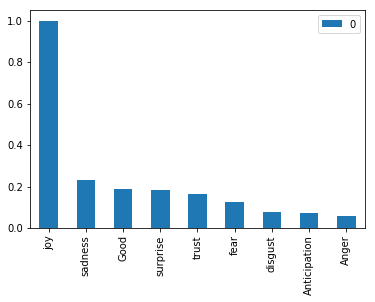

In [70]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()